## Drug2cell - Müllerian and Wolffian epithelia

In [1]:
import numpy as np
import pandas as pd

import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures-early/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.8.0
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 9.4.0
anndata             0.8.0
asciitree           NA
backcall            0.2.0
cairo               1.20.0
cffi                1.14.4
cloudpickle         2.0.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2022.02.1
dateutil            2.8.2
decorator           4.4.2
defusedxml          0.7.1
fasteners           0.17.3
fsspec              2022.02.0
google              NA
h5py                3.8.0
igraph              0.10.8
ipykernel           5.4.3
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              3.1.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.10.1
llvmlite            0.35.0
louvain             0.7.1
markupsafe          2.1.2
matplotlib          3.6.3
mpl_toolkits        NA
msgpack             1.0.3
natsort             8.2.0
numba               0.52.0
numcodecs           0.9.1
numexpr            

'/opt/conda/envs/atac_env/bin/python'

In [2]:
import drug2cell as d2c

In [3]:
early = sc.read('/nfs/team292/vl6/FetalReproductiveTract/early_pre10pcw.202412.h5ad')
import anndata
early = anndata.AnnData(X = early.raw.X, var = early.raw.var, obs = early.obs)
early.shape
early.shape

(185373, 36601)

In [4]:
# males_late = sc.read('/nfs/team292/vl6/FetalReproductiveTract/males_post10pcw.20240326.h5ad')
# males_late = anndata.AnnData(X = males_late.raw.X, var = males_late.raw.var, obs = males_late.obs)
# males_late.shape
# males_late.shape

In [5]:
# females_late = sc.read('/nfs/team292/vl6/FetalReproductiveTract/post_10pcw_females.20240326.h5ad')
# females_late = anndata.AnnData(X = females_late.raw.X, var = females_late.raw.var, obs = females_late.obs)
# females_late.shape
# females_late.shape

In [6]:
adata = early.copy()

In [7]:
adata.X[20:30, 20:30].toarray()

array([[0., 3., 1., 0., 1., 1., 0., 0., 1., 0.],
       [0., 2., 2., 0., 2., 0., 0., 0., 0., 2.],
       [0., 1., 2., 0., 1., 0., 1., 0., 3., 1.],
       [1., 3., 1., 0., 1., 1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 2., 0., 1., 0.],
       [3., 0., 3., 0., 0., 0., 1., 0., 2., 0.],
       [1., 1., 2., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 2., 0., 0., 0., 2., 0., 2., 0.],
       [2., 1., 1., 0., 1., 0., 0., 1., 1., 0.],
       [1., 2., 2., 0., 1., 0., 0., 0., 1., 0.]], dtype=float32)

In [9]:
np.unique(adata.obs['celltype'])

array(['Adrenal Cortex', 'Coelomic Epi', 'Corpus Cavernosum',
       'Corpus Spongiosum', 'Endothelial', 'Erythroid', 'Fallopian Lig',
       'Fallopian Mese', 'Genital Surface Epi', 'Glans', 'Immune',
       'Kidney - Loop of Henle', 'Kidney - Mese Progenitor',
       'Kidney - Podocyte', 'Kidney - Proximal Tubule',
       'Kidney - S-Shaped Body', 'Kidney - Ureteric Bud',
       'Labio-Scrotal Swelling', 'Lower Urogenital Sinus Mese',
       'Müllerian Epi', 'Müllerian Mese', 'Neural', 'Perivascular',
       'Prepuce', 'Preputial Lamina Epi', 'Schwann', 'Skeletal Muscle',
       'Upper Urogenital Sinus Mese', 'Urethral Epi',
       'Urogenital Sinus Epi', 'Urogenital Sinus Lig',
       'Urogenital Sinus SmMu', 'Uterus Mese', 'Vas Deferens Mese',
       'Wolffian Epi', 'Wolffian/Mesonephros Lig',
       'Wolffian/Mesonephros Mese'], dtype=object)

In [10]:
# Remove contaminants 
adata = adata[[i not in ['Adrenal Cortex',  'Endothelial', 'Erythroid', 'Fallopian Lig',
       'Fallopian Mese', 'Immune',
       'Kidney - Loop of Henle', 'Kidney - Mese Progenitor',
       'Kidney - Podocyte', 'Kidney - Proximal Tubule',
       'Kidney - S-Shaped Body', 'Kidney - Ureteric Bud',
       'Labio-Scrotal Swelling',  'Neural', 'Perivascular', 'Schwann', 'Skeletal Muscle',
                     'Vas Deferens Mese',  'Wolffian/Mesonephros Lig',  'Uterus Mese',] for i in adata.obs['celltype']]]

In [11]:
len(np.unique(adata.obs['celltype']))

17

In [12]:
np.unique(adata.obs['celltype'])

array(['Coelomic Epi', 'Corpus Cavernosum', 'Corpus Spongiosum',
       'Genital Surface Epi', 'Glans', 'Lower Urogenital Sinus Mese',
       'Müllerian Epi', 'Müllerian Mese', 'Prepuce',
       'Preputial Lamina Epi', 'Upper Urogenital Sinus Mese',
       'Urethral Epi', 'Urogenital Sinus Epi', 'Urogenital Sinus Lig',
       'Urogenital Sinus SmMu', 'Wolffian Epi',
       'Wolffian/Mesonephros Mese'], dtype=object)

In [ ]:
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin([ 'Ciliated_Epithelium']),
                                'FallopianTube_Ciliated_Epithelium', adata.obs['celltype'])
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin([ 'UrethralPlate','Urethral_Epithelium', 'Urethral_Plate']),
                                'UrethralPlate', adata.obs['celltype'])
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin(['GenitalTubercle_Glans', 'ExternalGenitalia_Glans']), 
                                                           'Glans', adata.obs['celltype'])
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin(['GenitalTubercle_CorpusSpongiosum', 'ExternalGenitalia_CorpusSpongiosum']), 
                                                           'CorpusSpongiosum', adata.obs['celltype'])
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin(['GenitalTubercle_CorpusCavernosum', 'ExternalGenitalia_CorpusCavernosum']), 
                                                           'CorpusCavernosum', adata.obs['celltype'])
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin(['GenitalTubercle_Prepuce', 'ExternalGenitalia_Prepuce']), 
                                                           'Prepuce', adata.obs['celltype'])
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin(['ExternalGenitalia_SubdermalPrepuce']), 
                                                           'SubdermalPrepuce', adata.obs['celltype'])
adata.obs['celltype'] = np.where(adata.obs['celltype'].isin(['Labial_Swelling', 'LabioScrotal_Swelling']), 
                                                           'LabioScrotal_Swelling', adata.obs['celltype'])

In [13]:
np.unique(adata.obs['celltype'])

array(['Coelomic Epi', 'Corpus Cavernosum', 'Corpus Spongiosum',
       'Genital Surface Epi', 'Glans', 'Lower Urogenital Sinus Mese',
       'Müllerian Epi', 'Müllerian Mese', 'Prepuce',
       'Preputial Lamina Epi', 'Upper Urogenital Sinus Mese',
       'Urethral Epi', 'Urogenital Sinus Epi', 'Urogenital Sinus Lig',
       'Urogenital Sinus SmMu', 'Wolffian Epi',
       'Wolffian/Mesonephros Mese'], dtype=object)

In [16]:
adata.obs['celltype'] = adata.obs['celltype'].astype('category')
adata.obs['celltype'] = adata.obs['celltype'].cat.reorder_categories([
    'Coelomic Epi',
'Müllerian Epi', 'Müllerian Mese',
 'Wolffian Epi',
       'Wolffian/Mesonephros Mese',
               
    'Urogenital Sinus Epi',
  'Upper Urogenital Sinus Mese',
 'Lower Urogenital Sinus Mese',
 'Urogenital Sinus Lig', 'Urogenital Sinus SmMu', 
    
    'Glans', 'Corpus Cavernosum', 'Corpus Spongiosum', 'Prepuce',
 'Urethral Epi', 'Preputial Lamina Epi', 'Genital Surface Epi', 

 
])

In [17]:
adata.raw = adata.copy()

In [18]:
sc.pp.filter_genes(adata, min_counts=10)

filtered out 7999 genes that are detected in less than 10 counts


In [19]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:01)


In [20]:
d2c.score(adata, use_raw=False, method = 'mean')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/drug2cell/__init__.py:208: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.uns['drug2cell'] = anndata.AnnData(scores, obs=adata.obs)


In [21]:
# read calculated d2c score abject
adata_d2c = adata.uns['drug2cell'].copy()

In [22]:
adata_d2c.obs['celltype'].value_counts()

Wolffian/Mesonephros Mese      33060
Urogenital Sinus Lig           17108
Lower Urogenital Sinus Mese    13495
Upper Urogenital Sinus Mese    12917
Corpus Cavernosum              11933
Corpus Spongiosum               8382
Coelomic Epi                    7174
Müllerian Mese                  5545
Glans                           5502
Wolffian Epi                    3901
Müllerian Epi                   3565
Prepuce                         3407
Urogenital Sinus Epi            2357
Preputial Lamina Epi            1127
Urethral Epi                     881
Urogenital Sinus SmMu            473
Genital Surface Epi              149
Name: celltype, dtype: int64

In [ ]:
%%time
sc.tl.rank_genes_groups(adata_d2c, groups=['Genital_Epidermis'], 
                        method="wilcoxon", groupby="celltype")

In [ ]:
# take significant drugs
target_group = 'Genital_Epidermis'
p_adj_thresh = 0.01
logFC_thresh = 2
rankscore_thresh = None
a = adata_d2c.copy()

if (rankscore_thresh==None) & (logFC_thresh==None):
    arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh)
elif (rankscore_thresh!=None) & (logFC_thresh==None):
    arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh) & \
          (a.uns['rank_genes_groups']['scores'][target_group] > rankscore_thresh)
elif (rankscore_thresh==None) & (logFC_thresh!=None):
    arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh) & \
          (a.uns['rank_genes_groups']['logfoldchanges'][target_group] > logFC_thresh)
elif (rankscore_thresh!=None) & (logFC_thresh!=None):
    arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh) & \
          (a.uns['rank_genes_groups']['logfoldchanges'][target_group] > logFC_thresh) & \
          (a.uns['rank_genes_groups']['scores'][target_group] > rankscore_thresh)

drugs_sel = list(a.uns['rank_genes_groups']['names'][target_group][arr])
len(drugs_sel)

In [ ]:
drugs_sel

In [30]:
import numpy as np
from numpy import random
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.sparse as sp
from scipy.sparse import issparse
from scipy.stats import zscore
from datetime import datetime
import pkg_resources
import warnings

def get_sig_drugs(a,
                  # cell_drug_obsm, 
                  groupby,
                  target_group,
                  reference='rest',
                  method='t-test',
                 corr_method='benjamini-hochberg',
                 tie_correct=False,
                  p_adj_thresh=0.05,
                  rankscore_thresh=0,
                  logFC_thresh=0,
                 ):
    
    '''
    # make anndata with cell-by-drug
    a=anndata.AnnData(X=adata.obsm[cell_drug_obsm],
                   obs=adata.obs,
                   var=pd.DataFrame(adata.obsm[cell_drug_obsm].columns).set_index(0))
    '''
    
    # rank_drugs_groups
    sc.tl.rank_genes_groups(a,groupby=groupby,method=method, groups=[target_group],reference=reference,
                           corr_method=corr_method,tie_correct=tie_correct)
    
    # take significant drugs
    if (rankscore_thresh==None) & (logFC_thresh==None):
        arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh)
    elif (rankscore_thresh!=None) & (logFC_thresh==None):
        arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh) & \
              (a.uns['rank_genes_groups']['scores'][target_group] > rankscore_thresh)
    elif (rankscore_thresh==None) & (logFC_thresh!=None):
        arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh) & \
              (a.uns['rank_genes_groups']['logfoldchanges'][target_group] > logFC_thresh)
    elif (rankscore_thresh!=None) & (logFC_thresh!=None):
        arr = (a.uns['rank_genes_groups']['pvals_adj'][target_group] < p_adj_thresh) & \
              (a.uns['rank_genes_groups']['logfoldchanges'][target_group] > logFC_thresh) & \
              (a.uns['rank_genes_groups']['scores'][target_group] > rankscore_thresh)
    
    return a.uns['rank_genes_groups']['names'][target_group][arr]        

        
def plot(adata,
                       groupby,
                       target_group=None,
                       significance=True,
                       reference_groups='rest',
                       stats_method='t-test',
                       p_adj_thresh=0.05,
                       rankscore_thresh=0,
                       logFC_thresh=0,
                       largest_effect=True,
                       scaling_method='zscore',
                       scaled_val_thresh=None,
                       add_drugcategory=False,
                       remove_chemblID=True,
                       return_df=False,
                      figsize=(20, 50),
                       row_cluster=True,
                      col_cluster=True,
                      dendrogram_ratio=0.05,
                      cbar_pos=(-0.03, 0.85, 0.01, 0.1),
                      cmap='coolwarm',
                      center=0,
                        category_colorpalette='Set2',
                        legend_loc=(0,0.2), legend_ncol=15,
                   save=None):
    
    # take group_by_drug
    _df = adata.uns['drug2cell'].to_df()
    _df[groupby]=adata.uns['drug2cell'].obs[groupby].copy()
    group_by_drug = _df.groupby(groupby).mean()
    group_by_drug.columns=group_by_drug.columns.astype('str')
    group_by_drug.index=group_by_drug.index.astype('str')
    
    # if target_group isspecified: drug selection
    if target_group in group_by_drug.index:
        
        ############ 
        print('### Filter drugs ###')
        ############
    
        # significant drugs
        if significance:
            print('# get significant drugs')
            sig_drugs=get_sig_drugs(adata.uns['drug2cell'],
                                    groupby,target_group, reference=reference_groups,
                                    method=stats_method, p_adj_thresh=p_adj_thresh,
                                    rankscore_thresh=rankscore_thresh, logFC_thresh=logFC_thresh,
                                    corr_method='benjamini-hochberg', tie_correct=False,
                             )
            sig_drugs=list(set(sig_drugs).intersection(group_by_drug.columns))
            group_by_drug=group_by_drug[sig_drugs]
            
            ################
            print(f'significant drugs: {len(group_by_drug.columns)}')
            ################
            
        # largest effect drugs
        if largest_effect:
            print('# get largest effect drugs')
            drug_by_group=group_by_drug.T.copy()
            drug_by_group=drug_by_group[drug_by_group[target_group]==drug_by_group.max(axis=1)]
            group_by_drug=drug_by_group.T.copy()
            
            ################
            print(f'largest effect drugs: {len(group_by_drug.columns)}')
            ################
        
        # select drugs based on z-score threshold
        # scaling 
        print('# scaling')
        if scaling_method=='zscore':
            group_by_drug = group_by_drug.apply(zscore)
            # select drugs based on z-score threshold
            drug_by_group=group_by_drug.T.copy() # transform to drug-by-group
            if scaled_val_thresh!=None:
                print('# filtering based on scaled value cutoff')
                drug_by_group=drug_by_group[drug_by_group[target_group]>=scaled_val_thresh] 
        elif scaling_method=='minmax':
            group_by_drug=(group_by_drug-group_by_drug.min())/(group_by_drug.max()-group_by_drug.min())
            drug_by_group=group_by_drug.T.copy()
        elif scaling_method==None:
            drug_by_group=group_by_drug.T.copy()
        else:
            raise KeyError(f'{scaling_method}: invalid <scaling_method>')
            
        # selected drug number
        if drug_by_group.shape[0]==0:
            raise ValueError(f'no selected drugs for {target_group}')
        else:
            print(f'{drug_by_group.shape[0]} selected drugs for {target_group}')
    
    elif target_group==None:
        ############ 
        # Scaling 
        ############
        if scaling_method=='zscore':
            group_by_drug = group_by_drug.apply(zscore)
            drug_by_group=group_by_drug.T.copy()
        elif scaling_method=='minmax':
            group_by_drug=(group_by_drug-group_by_drug.min())/(group_by_drug.max()-group_by_drug.min())
            drug_by_group=group_by_drug.T.copy()
        elif scaling_method==None:
            drug_by_group=group_by_drug.T.copy()
        else:
            raise KeyError(f'{scaling_method}: invalid <scaling_method>')
    else:
        raise KeyError(f'{target_group}: invalid <target_group>')
    
   
    # add drug category or not
    if add_drugcategory!=False:
        ############ 
        print('### Add drug category to the heatmap ###')
        ############
        
        comp_dict_all=pd.read_pickle('/nfs/team205/kk18/data/ChEMBL/pkls/comp_target_dict/drug-target_dicts.pkl')
        
        # subset dictionary
        if add_drugcategory=='level1':
            l=[v for k,v in comp_dict_all.items() if (len(k)==1)|(k=='No-category')]
            categories=[k for k,v in comp_dict_all.items() if len(k)==1]
        elif add_drugcategory=='level2':
            l=[v for k,v in comp_dict_all.items() if (len(k)==3)|(k=='No-category')]
            categories=[k for k,v in comp_dict_all.items() if len(k)==3]
        else:
            raise KeyError(f'{add_drugcategory}: invalid <add_drugcategory>. should be "level1" or "level2"')
        categories.sort()
        categories=categories+['No-category']
        comp_dict={k:v for d in l for k,v in d.items()}
        
        # search category
        category_dict={}
        for k in categories:
            category_dict[k]=[x in comp_dict_all[k].keys() for x in drug_by_group.index]
        
        category_df = pd.DataFrame(category_dict)
        category_df.index=drug_by_group.index
        
        # remove drugs which is not in any category
        category_df=category_df[category_df.any(axis=1)]
        drug_by_group=drug_by_group.reindex(category_df.index)
        
        # add category
        drug_by_group['ATCcode']=np.nan
        for d in category_df.index:
            drug_by_group.loc[d,'ATCcode']=' | '.join(category_df.columns[category_df.loc[d]])
            
        
        ############ 
        print('### Plotting ###')
        ############
        
        # remove chemblID from compounds name
        if remove_chemblID:
            drug_by_group.index=[x.split('|')[1] for x in drug_by_group.index]
        
        # sort dataframe
        ## drug name: alphabetical order
        drug_by_group=drug_by_group.reset_index().sort_values('index').set_index('index')
        ## drug category (ATC code)
        drug_by_group['code_order']=[categories.index(x[0]) if x!='No-category' else len(categories)-1 for x in drug_by_group['ATCcode']]
        drug_by_group.sort_values(['code_order','ATCcode'],inplace=True) # 'ATCcode': to make combined ones later order
        drug_by_group.drop('code_order',axis=1,inplace=True)
        
        if return_df:
            return drug_by_group

        # plotting 
        sample_cols=dict(zip(drug_by_group['ATCcode'].unique(),sns.color_palette(category_colorpalette, len(drug_by_group['ATCcode'].unique()))))
        row_colors = pd.DataFrame({'ATCcode':[sample_cols[i] for i in drug_by_group['ATCcode']]})
        row_colors.index = drug_by_group.index
        
        g = sns.clustermap(drug_by_group.drop(['ATCcode'],axis=1).astype(float), 
                       figsize=figsize, dendrogram_ratio=dendrogram_ratio, 
                           cmap='coolwarm',center=center,
                      row_cluster=row_cluster,col_cluster=col_cluster,
                           row_colors=row_colors)

        g.ax_heatmap.tick_params(axis='y', labelright=False,labelleft=True,
                                 right=False, left=True)

        # Draw the legend bar for the classes                 
        for label in drug_by_group['ATCcode'].unique():
            g.ax_col_dendrogram.bar(0, 0, color=sample_cols[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc=legend_loc, ncol=legend_ncol, frameon=False)

        # Adjust the postion of the main colorbar for the heatmap
        g.cax.set_position(cbar_pos)
    
    else:
        if remove_chemblID:
            drug_by_group.index=[x.split('|')[1] for x in drug_by_group.index]
        
        if return_df:
            return drug_by_group
        
        sns.clustermap(drug_by_group,
                   figsize=figsize,
                   dendrogram_ratio=dendrogram_ratio, 
                   row_cluster=row_cluster,col_cluster=col_cluster,
               cbar_pos=cbar_pos, cmap=cmap, center=center)
    
    if save!=None:
        plt.savefig(save)

    plt.show()

    
def plot2(adata,
                       groupby,
          target_group=None,
                       drugs_to_plot=None,
                       rankscore_thresh=0,
                       logFC_thresh=0,
                       largest_effect=True,
                       scaling_method='zscore',
                       scaled_val_thresh=None,
                       add_drugcategory=False,
                          remove_nocategory=False,
                       remove_chemblID=True,
                       return_df=False,
                      figsize=(20, 50),
                       row_cluster=True,
                      col_cluster=True,
                      dendrogram_ratio=0.05,
                      cbar_pos=(-0.03, 0.85, 0.01, 0.1),
                      cmap='coolwarm',
                      center=0,
                        category_colorpalette='Set2',
                        legend_loc=(0,0.2), legend_ncol=15,
                   save=None):
    
    # take group_by_drug
    if 'drug2cell' in adata.uns.keys():
        _df = adata.uns['drug2cell'].to_df()
        _df[groupby]=adata.uns['drug2cell'].obs[groupby].copy()
    else:
        _df = adata.to_df()
        _df[groupby]=adata.obs[groupby].copy()
    group_by_drug = _df.groupby(groupby).mean()
    group_by_drug.columns=group_by_drug.columns.astype('str')
    group_by_drug.index=group_by_drug.index.astype('str') 
    
    # if target_group isspecified: drug selection
    if target_group in group_by_drug.index:
        
        ############ 
        print('### Filtering drugs ###')
        ############
    
        # significant drugs
        if drugs_to_plot!=None:
            drugs_to_plot=list(set(drugs_to_plot).intersection(group_by_drug.columns))
            group_by_drug=group_by_drug[drugs_to_plot]
            
        # largest effect drugs
        if largest_effect:
            print('# get largest effect drugs')
            drug_by_group=group_by_drug.T.copy()
            drug_by_group=drug_by_group[drug_by_group[target_group]==drug_by_group.max(axis=1)]
            group_by_drug=drug_by_group.T.copy()
            
            ################
            print(f'largest effect drugs: {len(group_by_drug.columns)}')
            ################
        
        # select drugs based on z-score threshold
        # scaling 
        print('# scaling')
        if scaling_method=='zscore':
            group_by_drug = group_by_drug.apply(zscore)
            # select drugs based on z-score threshold
            drug_by_group=group_by_drug.T.copy() # transform to drug-by-group
            if scaled_val_thresh!=None:
                print('# filtering based on scaled value cutoff')
                drug_by_group=drug_by_group[drug_by_group[target_group]>=scaled_val_thresh] 
        elif scaling_method=='minmax':
            group_by_drug=(group_by_drug-group_by_drug.min())/(group_by_drug.max()-group_by_drug.min())
            drug_by_group=group_by_drug.T.copy()
        elif scaling_method==None:
            drug_by_group=group_by_drug.T.copy()
        else:
            raise KeyError(f'{scaling_method}: invalid <scaling_method>')
            
        # selected drug number
        if drug_by_group.shape[0]==0:
            raise ValueError(f'no selected drugs for {target_group}')
        else:
            print(f'{drug_by_group.shape[0]} selected drugs for {target_group}')
    
    elif target_group==None:
        ############ 
        # Scaling 
        ############
        if scaling_method=='zscore':
            group_by_drug = group_by_drug.apply(zscore)
            drug_by_group=group_by_drug.T.copy()
        elif scaling_method=='minmax':
            group_by_drug=(group_by_drug-group_by_drug.min())/(group_by_drug.max()-group_by_drug.min())
            drug_by_group=group_by_drug.T.copy()
        elif scaling_method==None:
            drug_by_group=group_by_drug.T.copy()
        else:
            raise KeyError(f'{scaling_method}: invalid <scaling_method>')
    else:
        raise KeyError(f'{target_group}: invalid <target_group>')
    
   
    # add drug category or not
    if add_drugcategory!=False:
        ############ 
        print('### Add drug category to the heatmap ###')
        ############
        
        comp_dict_all=pd.read_pickle('/nfs/team205/kk18/data/ChEMBL/pkls/comp_target_dict/drug-target_dicts.pkl')
        
        # subset dictionary
        if add_drugcategory=='level1':
            if remove_nocategory:
                l=[v for k,v in comp_dict_all.items() if (len(k)==1)]
            else:
                l=[v for k,v in comp_dict_all.items() if (len(k)==1)|(k=='No-category')]
            categories=[k for k,v in comp_dict_all.items() if len(k)==1]
        elif add_drugcategory=='level2':
            if remove_nocategory:
                l=[v for k,v in comp_dict_all.items() if (len(k)==3)]
            else:
                l=[v for k,v in comp_dict_all.items() if (len(k)==3)|(k=='No-category')]
            categories=[k for k,v in comp_dict_all.items() if len(k)==3]
        else:
            raise KeyError(f'{add_drugcategory}: invalid <add_drugcategory>. should be "level1" or "level2"')
        categories.sort()
        if remove_nocategory:
            pass
        else:
            categories=categories+['No-category']
        comp_dict={k:v for d in l for k,v in d.items()}
        
        # search category
        category_dict={}
        for k in categories:
            category_dict[k]=[x in comp_dict_all[k].keys() for x in drug_by_group.index]
        
        category_df = pd.DataFrame(category_dict)
        category_df.index=drug_by_group.index
        
        # remove drugs which is not in any category
        category_df=category_df[category_df.any(axis=1)]
        drug_by_group=drug_by_group.reindex(category_df.index)
        
        # add category
        drug_by_group['ATCcode']=np.nan
        for d in category_df.index:
            drug_by_group.loc[d,'ATCcode']=' | '.join(category_df.columns[category_df.loc[d]])
            
        
        ############ 
        print('### Plotting ###')
        ############
        
        # remove chemblID from compounds name
        if remove_chemblID:
            drug_by_group.index=[x.split('|')[1] for x in drug_by_group.index]
        
        # sort dataframe
        ## drug name: alphabetical order
        drug_by_group=drug_by_group.reset_index().sort_values('index').set_index('index')
        ## drug category (ATC code)
        drug_by_group['code_order']=[categories.index(x[0]) if x!='No-category' else len(categories)-1 for x in drug_by_group['ATCcode']]
        drug_by_group.sort_values(['code_order','ATCcode'],inplace=True) # 'ATCcode': to make combined ones later order
        drug_by_group.drop('code_order',axis=1,inplace=True)
        
        if return_df:
            return drug_by_group

        # plotting 
        sample_cols=dict(zip(drug_by_group['ATCcode'].unique(),sns.color_palette(category_colorpalette, len(drug_by_group['ATCcode'].unique()))))
        row_colors = pd.DataFrame({'ATCcode':[sample_cols[i] for i in drug_by_group['ATCcode']]})
        row_colors.index = drug_by_group.index
        
        g = sns.clustermap(drug_by_group.drop(['ATCcode'],axis=1).astype(float), 
                       figsize=figsize, dendrogram_ratio=dendrogram_ratio, 
                           cmap='coolwarm',center=center,
                      row_cluster=row_cluster,col_cluster=col_cluster,
                           row_colors=row_colors)

        g.ax_heatmap.tick_params(axis='y', labelright=False,labelleft=True,
                                 right=False, left=True)

        # Draw the legend bar for the classes                 
        for label in drug_by_group['ATCcode'].unique():
            g.ax_col_dendrogram.bar(0, 0, color=sample_cols[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc=legend_loc, ncol=legend_ncol, frameon=False)

        # Adjust the postion of the main colorbar for the heatmap
        g.cax.set_position(cbar_pos)
    
    else:
        if remove_chemblID:
            drug_by_group.index=[x.split('|')[1] for x in drug_by_group.index]
        
        if return_df:
            return drug_by_group
        
        sns.clustermap(drug_by_group,
                   figsize=figsize,
                   dendrogram_ratio=dendrogram_ratio, 
                   row_cluster=row_cluster,col_cluster=col_cluster,
               cbar_pos=cbar_pos, cmap=cmap, center=center)
    
    if save!=None:
        plt.savefig(save, bbox_inches="tight")
    
    plt.show()    

In [ ]:
def filter_drugs(adata_d2c, groupby_obs, celltype, selected_drugs):
    # no threshold to select drugs
    sig_drugs_df = plot2(adata_d2c,
                       groupby=groupby_obs,
                       target_group=celltype,
                             drugs_to_plot=selected_drugs,
                       largest_effect=False,
                             add_drugcategory=False,
                             remove_chemblID=False,
                             return_df=True)
    
    all_targets = []
    for d in sig_drugs_df.index.to_list():
        targets = adata.uns['drug2cell'].var.loc[d, 'genes']
        if ',' in targets:
            targets = targets.split(',')
        else: 
            targets = [targets]
        all_targets.extend(targets)
    
    unique_targets = list(np.unique(all_targets))
    
    gene_ids = unique_targets.copy()
    clusters = adata.obs[groupby_obs].cat.categories
    obs = adata.raw[:,gene_ids].X.toarray()
    obs = pd.DataFrame(obs,columns=gene_ids,index=adata.obs[groupby_obs])
    average_obs = obs.groupby(level=0).mean()
    average_obs = average_obs.T
    
    obs_bool = obs.astype(bool)
    fraction_obs = obs_bool.groupby(level=0).sum()/obs_bool.groupby(level=0).count()
    fraction_obs = fraction_obs.T
    
    # select genes which 
    expprop_thresh=0.1
    gene_list = list(fraction_obs.index[(fraction_obs[celltype]>=expprop_thresh)])
    print(gene_list)
    sc.pl.dotplot(adata, var_names = gene_list, groupby = groupby_obs,
             standard_scale = 'var', color_map = 'OrRd')
    print('Would you like to remove any of the plotted genes?')
    # Ask the user for elements to remove
    genes_to_remove = input("Enter the elements you want to remove (separated by space): ").split()

    # Create a new list without the specified elements
    gene_list = [g for g in gene_list if g not in genes_to_remove]
    sc.pl.dotplot(adata, var_names = gene_list, groupby = groupby_obs, 
                  standard_scale = 'var', color_map = 'OrRd')
    
    filtered = []
    for d in sig_drugs_df.index.to_list():
        targets = adata.uns['drug2cell'].var.loc[d, 'genes']
        if ',' in targets:
            targets = targets.split(',')
        else: 
            targets = [targets]
        targets_expressed = [g for g in targets if g in gene_list]
        if len(targets_expressed) > 0:
            print(d, ': ', targets_expressed)
            filtered.append(d)
    print("You're left with {} drugs".format(len(filtered)))
    return filtered

In [ ]:
adata_d2c

In [ ]:
drugs_filt = filter_drugs(adata_d2c, 'celltype', 'Genital_Epidermis', 
                         drugs_sel)

In [ ]:
adata_d2c

In [ ]:
CHEMBL395429|OXYTOCIN :  ['AVPR1A']
CHEMBL373742|VASOPRESSIN :  ['AVPR1A']
CHEMBL1755|CONIVAPTAN :  ['AVPR1A']
CHEMBL95889|BETAINE :  ['BHMT', 'BHMT2']
CHEMBL1200690|LYPRESSIN :  ['AVPR1A']
CHEMBL1200699|DOXYCYCLINE :  ['MMP7']
CHEMBL277062|BROMAZEPAM :  ['GABRA2']
CHEMBL1715|PIOGLITAZONE HYDROCHLORIDE :  ['PPARG']
CHEMBL1393|SPIRONOLACTONE :  ['PPARG']
CHEMBL1201108|CONIVAPTAN HYDROCHLORIDE :  ['AVPR1A']
CHEMBL1200556|DESMOPRESSIN ACETATE :  ['AVPR1A']
CHEMBL1201528|VASOPRESSIN TANNATE :  ['AVPR1A']
CHEMBL3989740|DOXYCYCLINE HYCLATE :  ['MMP7']
CHEMBL1200633|IVERMECTIN :  ['ABCB1']
CHEMBL1201162|DORZOLAMIDE HYDROCHLORIDE :  ['CA2']
CHEMBL843|ROSIGLITAZONE MALEATE :  ['PPARG']
CHEMBL220491|BRINZOLAMIDE :  ['CA2']
CHEMBL2108986|ARGIPRESSIN TANNATE :  ['AVPR1A']
CHEMBL2364574|DOXYCYCLINE CALCIUM :  ['MMP7']
CHEMBL17|DICHLORPHENAMIDE :  ['CA2']
CHEMBL3545188|PASIREOTIDE PAMOATE :  ['SSTR2']
CHEMBL20|ACETAZOLAMIDE :  ['CA2']
CHEMBL2103870|LUMACAFTOR :  ['CFTR']
CHEMBL4298128|ELEXACAFTOR :  ['CFTR']
CHEMBL2010601|IVACAFTOR :  ['CFTR']
    CHEMBL2109036|IGOVOMAB :  ['MUC16']
CHEMBL1371|CHLORZOXAZONE :  ['KCNN4']
    CHEMBL477|ADENOSINE :  ['ADORA2B']
        CHEMBL1200569|CAFFEINE, CITRATED :  ['ADORA2B']
            CHEMBL766|CILASTATIN :  ['DPEP1']
                CHEMBL1201057|CILASTATIN SODIUM :  ['DPEP1']

In [23]:
all_drugs = ['CHEMBL1200814|ACETAZOLAMIDE SODIUM','CHEMBL17|DICHLORPHENAMIDE', 'CHEMBL3833320|EPTINEZUMAB',
'CHEMBL220491|BRINZOLAMIDE', 'CHEMBL1200480|OCTREOTIDE ACETATE', 'CHEMBL1680|OCTREOTIDE',
'CHEMBL1201162|DORZOLAMIDE HYDROCHLORIDE','CHEMBL4297756|FREMANEZUMAB',
'CHEMBL3545188|PASIREOTIDE PAMOATE', 'CHEMBL1201184|LANREOTIDE ACETATE',
'CHEMBL3989924|LUTETIUM DOTATATE LU-177', 'CHEMBL3707328|GALCANEZUMAB',
'CHEMBL20|ACETAZOLAMIDE','CHEMBL3039588|PASIREOTIDE DIASPARTATE', 
             
'CHEMBL1200690|LYPRESSIN','CHEMBL3989740|DOXYCYCLINE HYCLATE', 'CHEMBL1200699|DOXYCYCLINE',
'CHEMBL1393|SPIRONOLACTONE','CHEMBL1200556|DESMOPRESSIN ACETATE','CHEMBL95889|BETAINE',
'CHEMBL843|ROSIGLITAZONE MALEATE','CHEMBL1755|CONIVAPTAN','CHEMBL1201108|CONIVAPTAN HYDROCHLORIDE',
'CHEMBL373742|VASOPRESSIN', 'CHEMBL1715|PIOGLITAZONE HYDROCHLORIDE','CHEMBL395429|OXYTOCIN',
'CHEMBL1201528|VASOPRESSIN TANNATE','CHEMBL264374|BEZAFIBRATE','CHEMBL135400|ZOPICLONE','CHEMBL2364574|DOXYCYCLINE CALCIUM',
'CHEMBL2108986|ARGIPRESSIN TANNATE','CHEMBL277062|BROMAZEPAM','CHEMBL1200633|IVERMECTIN',
'CHEMBL2109036|IGOVOMAB','CHEMBL1200760|BALSALAZIDE DISODIUM',
'CHEMBL1201013|OLSALAZINE SODIUM',
             
'CHEMBL4585668|BELZUTIFAN','CHEMBL573|NIACIN'


            ]

In [35]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                         frameon=True, vector_friendly=True, fontsize=14, figsize=[7,7], color_map=None, 
                         format='pdf', facecolor=None, transparent=False)

In [36]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [28]:
adata_d2c.obs['celltype'] = adata_d2c.obs['celltype'].astype('category')
adata_d2c.obs['celltype'] = adata_d2c.obs['celltype'].cat.reorder_categories([
     'Coelomic Epi',
'Müllerian Epi', 'Müllerian Mese',
 'Wolffian Epi',
       'Wolffian/Mesonephros Mese',
               
    'Urogenital Sinus Epi',
  'Upper Urogenital Sinus Mese',
 'Lower Urogenital Sinus Mese',
 'Urogenital Sinus Lig', 'Urogenital Sinus SmMu', 
    
    'Glans', 'Corpus Cavernosum', 'Corpus Spongiosum', 'Prepuce',
 'Urethral Epi', 'Preputial Lamina Epi', 'Genital Surface Epi', 


 
])

### Filtering drugs ###
# scaling
38 selected drugs for Genital Surface Epi
### Add drug category to the heatmap ###
### Plotting ###


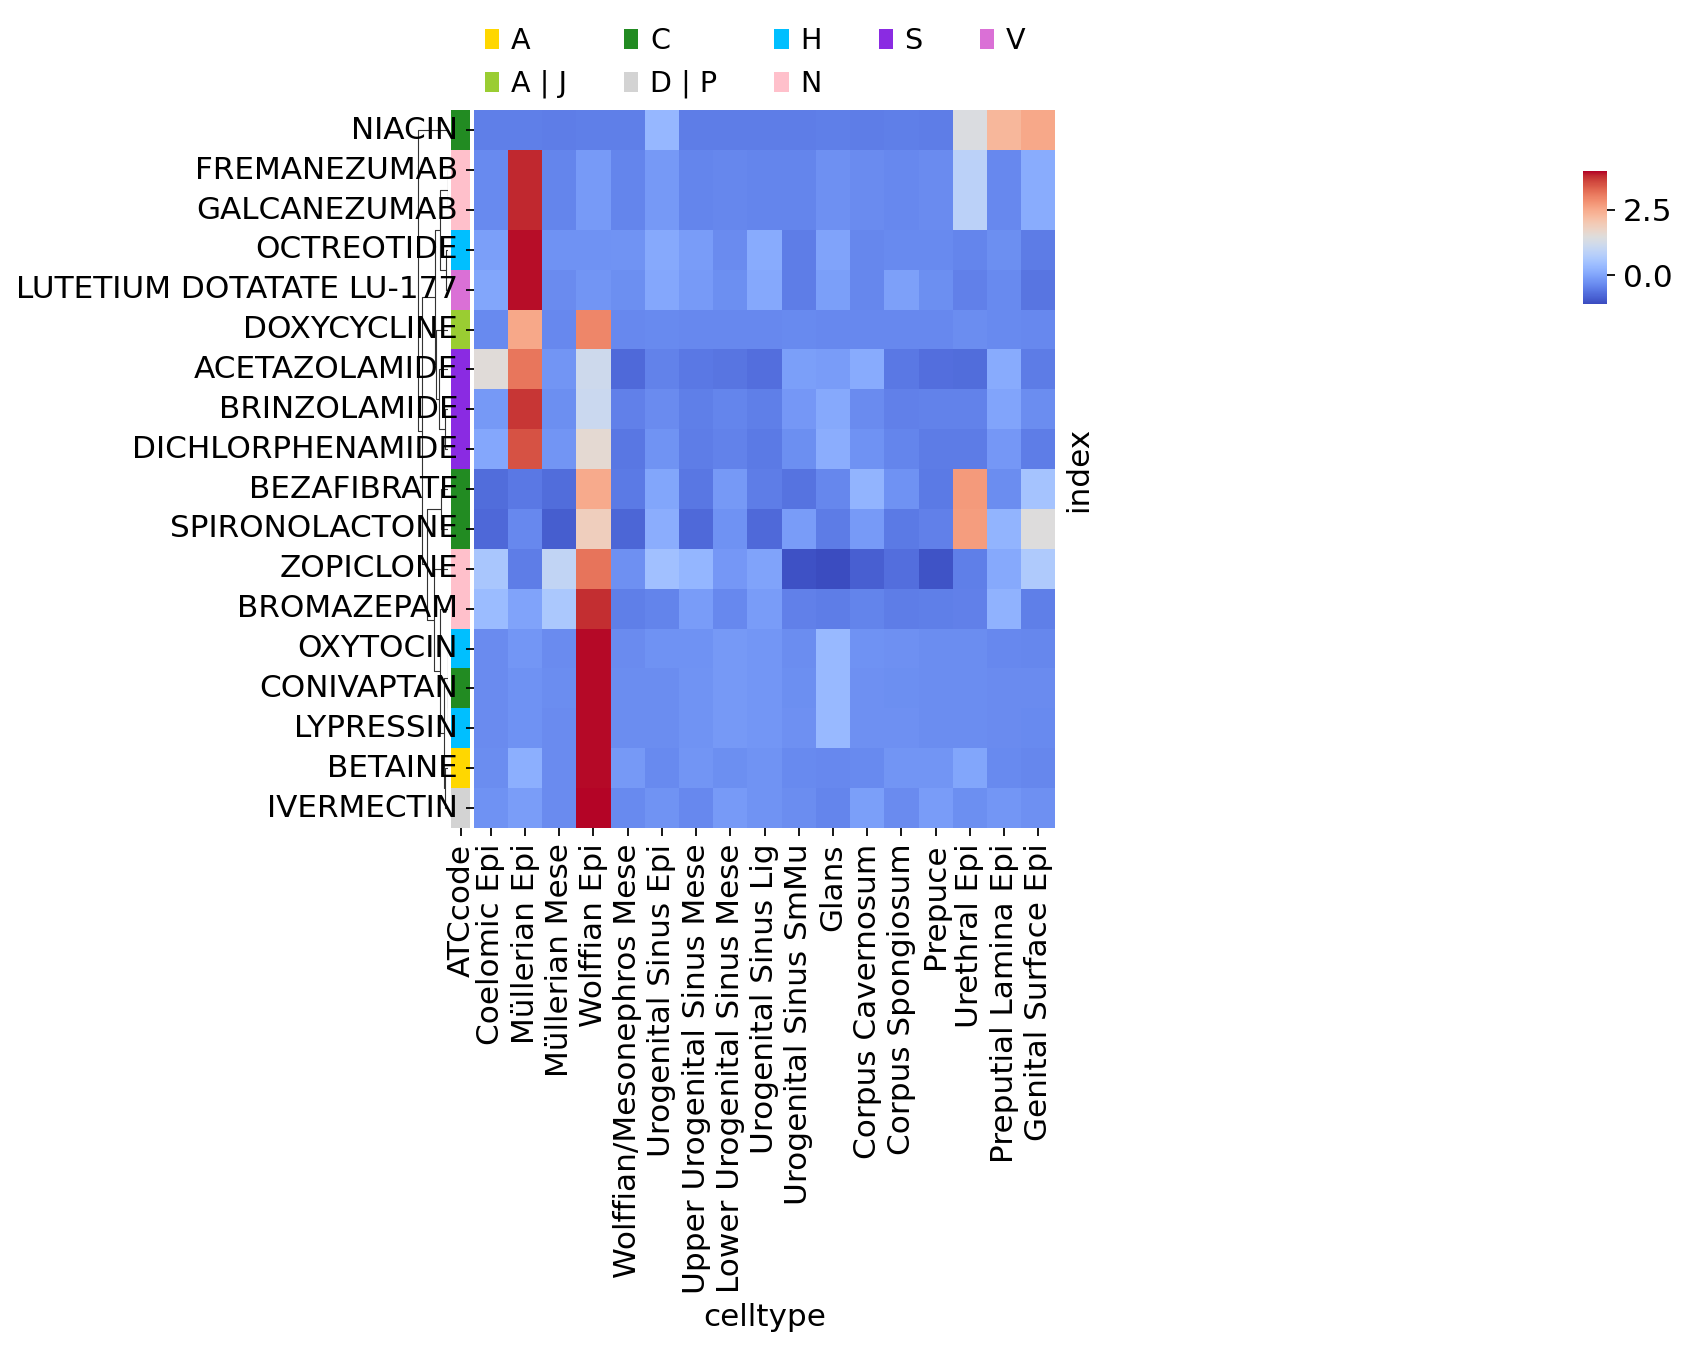

In [40]:
plot2(adata_d2c,groupby='celltype',target_group='Genital Surface Epi',
        drugs_to_plot=all_drugs,largest_effect=False,scaling_method='zscore',scaled_val_thresh=None,
                       add_drugcategory='level1',
               remove_nocategory=True,
                        figsize=(7.5, 8.3),
                         row_cluster=True,
                         col_cluster=False,
                      cbar_pos=(1, 0.8, 0.02, 0.1),
                      cmap='coolwarm',
                      center=None,
                        legend_loc=(0,0), legend_ncol=5,
      category_colorpalette = ['gold', 'yellowgreen',  'forestgreen', 'lightgrey', 'deepskyblue', 'pink','blueviolet', 
                               'orchid',  'brown', 'navy','lightgray', ],
                 save='_epi_pre10pcw_horizontal_drug2cell_logFC-2.pdf'
     )

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


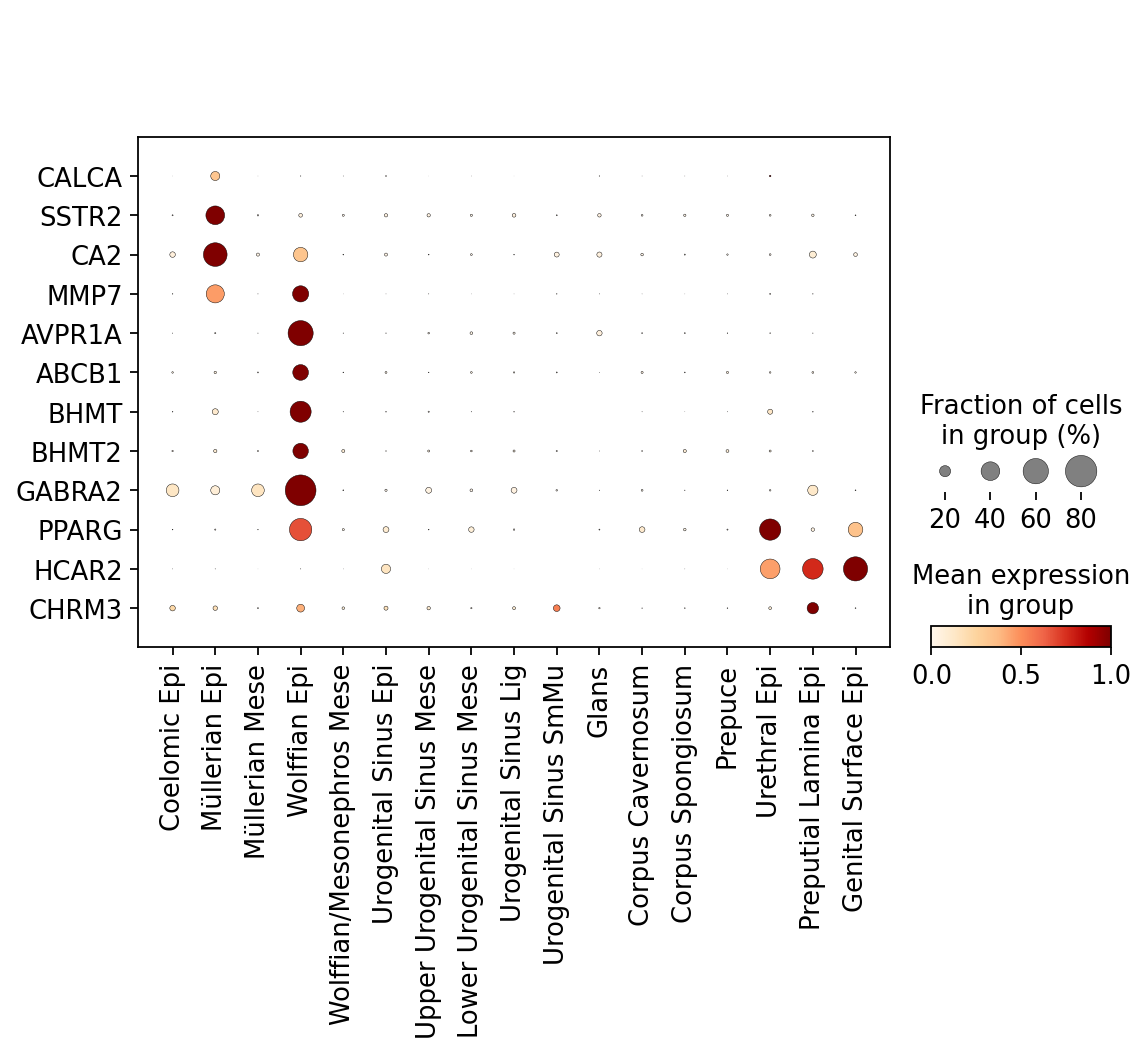

In [38]:
sc.pl.dotplot(adata, var_names = ['CALCA', 'SSTR2', 'CA2', 'MMP7', 'AVPR1A','ABCB1', 'BHMT', 'BHMT2', 
                                 'GABRA2', 'PPARG', 'HCAR2',  'CHRM3' ], groupby = 'celltype',
             standard_scale = 'var', color_map = 'OrRd', swap_axes = True, 
             save = '_targets_early_epi_mullerian_wolffian')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


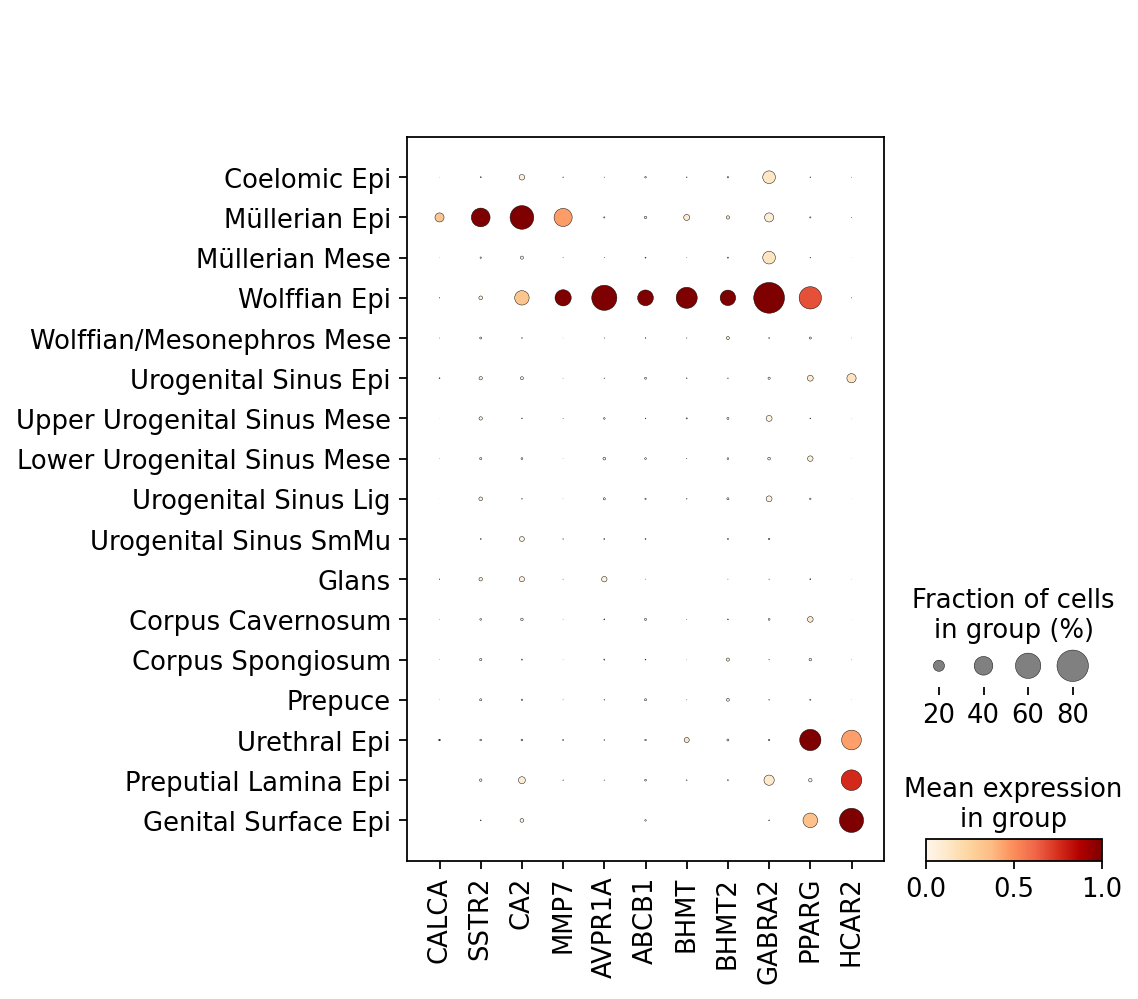

In [39]:
sc.pl.dotplot(adata, var_names = ['CALCA', 'SSTR2', 'CA2', 'MMP7', 'AVPR1A','ABCB1', 'BHMT', 'BHMT2', 
                                 'GABRA2', 'PPARG', 'HCAR2' ], groupby = 'celltype',
             standard_scale = 'var', color_map = 'OrRd', swap_axes = False, 
             save = '_targets_early_epi_mullerian_wolffian_vertical')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


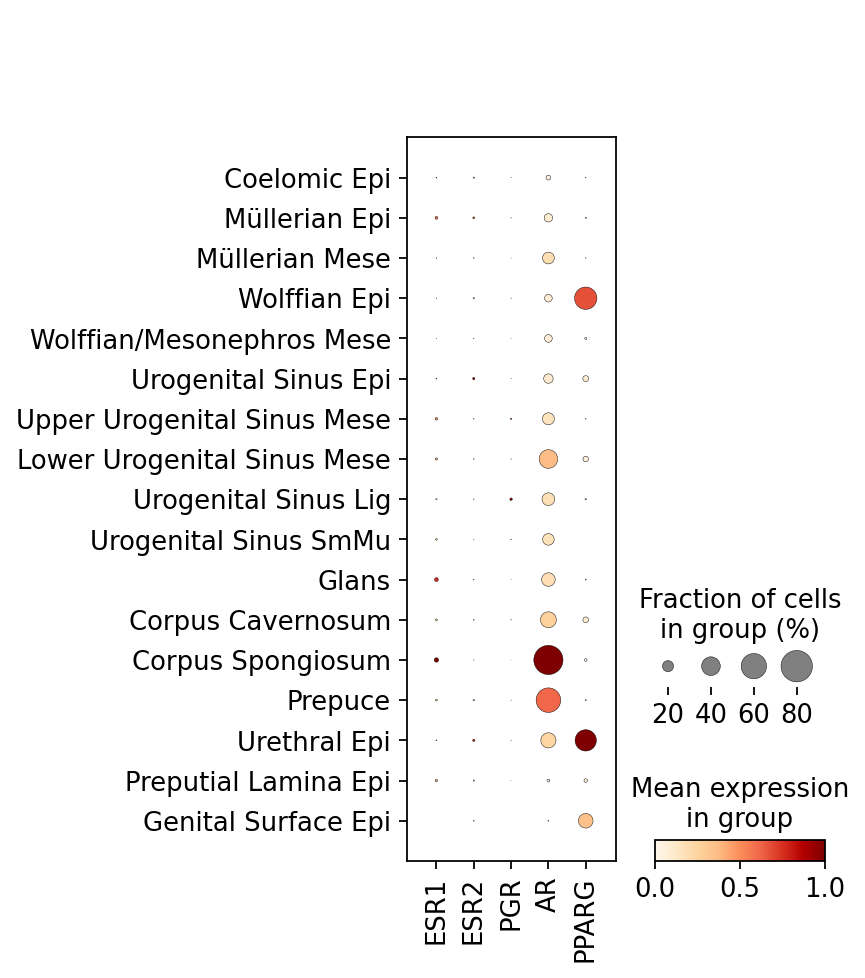

In [37]:
sc.pl.dotplot(adata, var_names = ['ESR1', 'ESR2',  'PGR', 'AR', 'PPARG'], groupby = 'celltype',
             standard_scale = 'var', color_map = 'OrRd', swap_axes = False, 
             save = '_EDC_receptors_pre10pcw')